In [4]:
import pandas as pd

comments_gh_ai = []
comments_gh_ai_sampled = []

comment_gh_ai_csv_path = '../../rq1/dataset/hn-comments-gh-ai.csv'
for chunk in  pd.read_csv(comment_gh_ai_csv_path, sep=',', chunksize=2000):
    comments_gh_ai.append(chunk)

comment_gh_ai_sampled_csv_path = '../dataset/hn-comments-gh-ai-sampled.csv'
for chunk in  pd.read_csv(comment_gh_ai_sampled_csv_path, sep=',', chunksize=2000):
    comments_gh_ai_sampled.append(chunk)

# Concatenate all chunks into a single DataFrame
comments_gh_ai_df = pd.concat(comments_gh_ai)
comments_gh_ai_sampled_df = pd.concat(comments_gh_ai_sampled)

# Visualize separately

In [5]:
import matplotlib.pyplot as plt

def plot_hist_comments(df, name: str):
    # Convert the 'timestamp' column to datetime
    df['comment_time'] = pd.to_datetime(df['comment_time'])

    plt.figure(figsize=(15, 7))
    plt.hist(df['comment_time'], bins=50, edgecolor='black')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Stories')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True, alpha=0.8)
    plt.show()

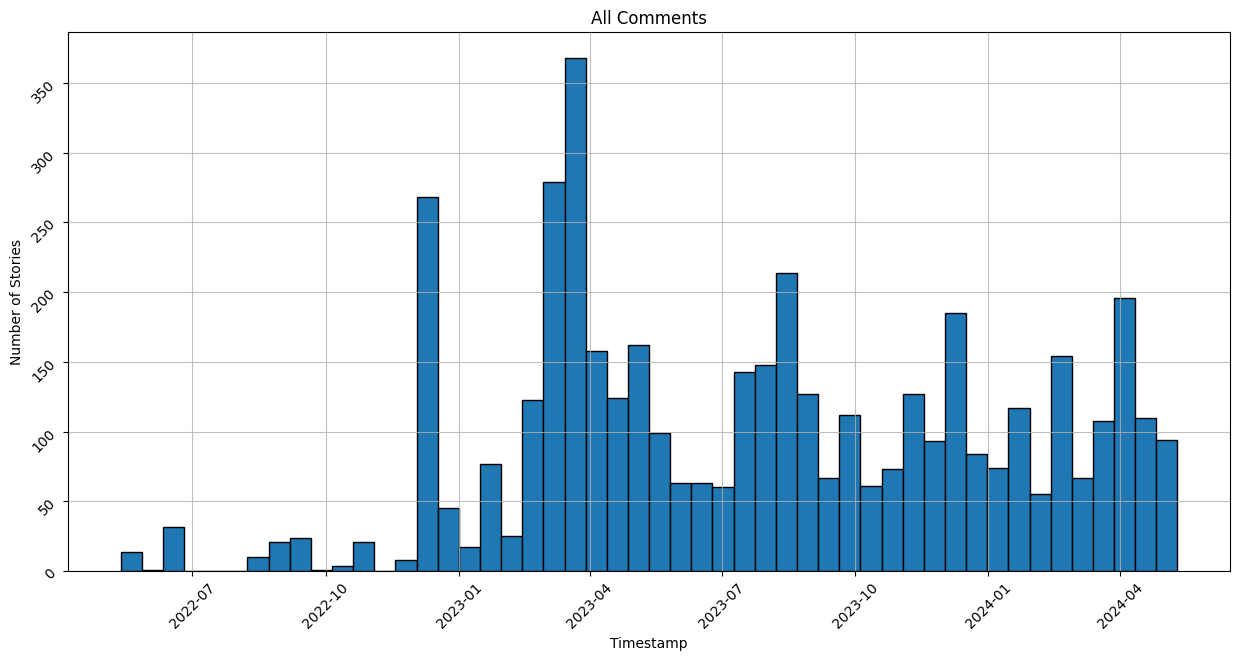

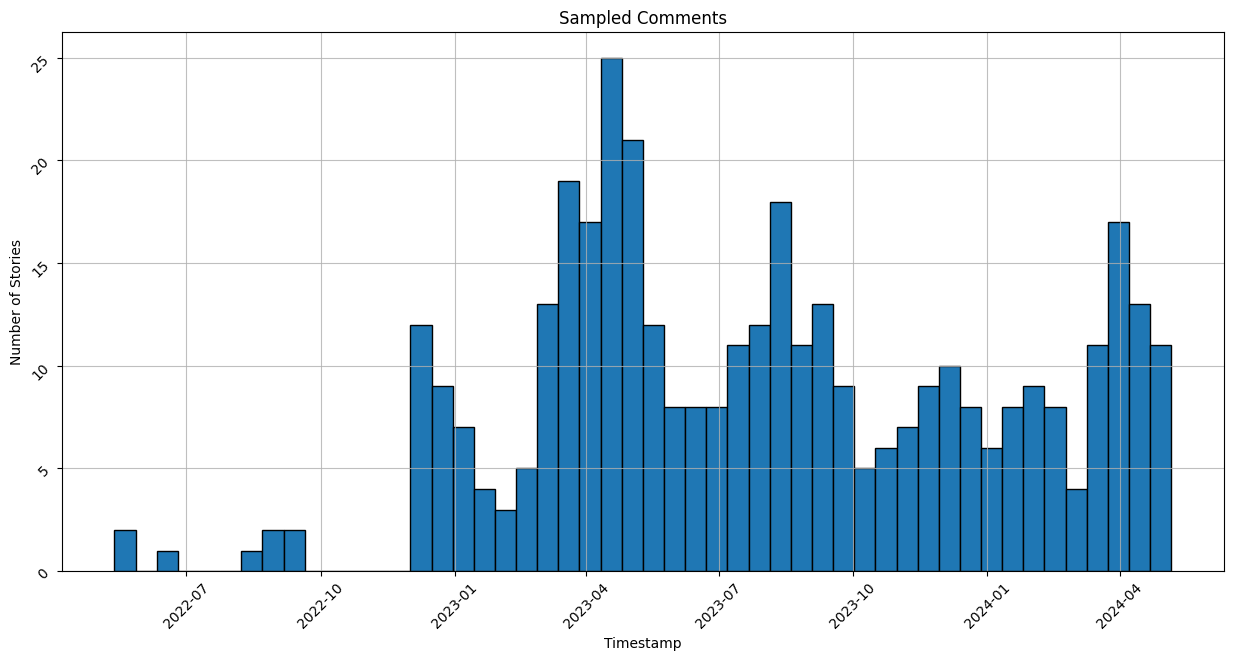

In [6]:
plot_hist_comments(comments_gh_ai_df, 'All Comments')
plot_hist_comments(comments_gh_ai_sampled_df, 'Sampled Comments')

# Visualize both HN GH-AI comments and sampled HN GH-AI comments

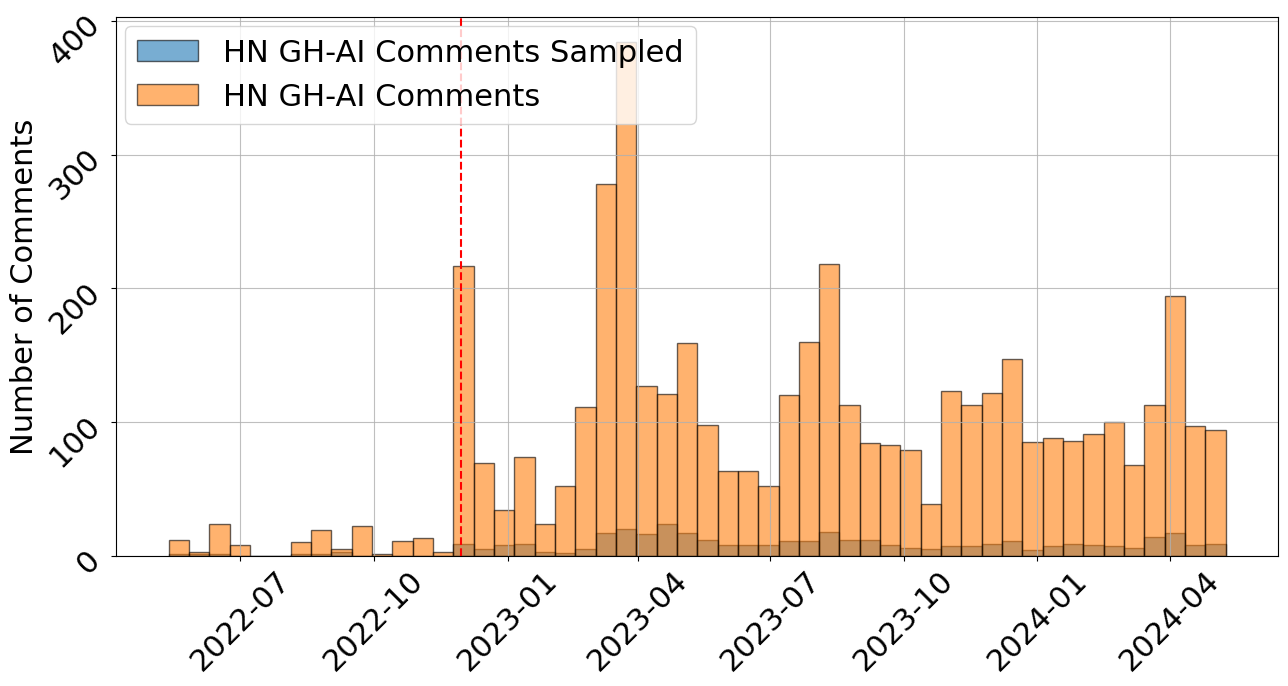

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_hist_comments_overlap(df1, df2, name1: str, name2: str):
    # Convert the 'comment_time' column to datetime
    df1['comment_time'] = pd.to_datetime(df1['comment_time'])
    df2['comment_time'] = pd.to_datetime(df2['comment_time'])

    # Set fontsize for all plots
    plt.rcParams.update({'font.size': 22})

    plt.figure(figsize=(15, 7))

    # Create a date range with a frequency of 7 days
    min_date = min(df1['comment_time'].min(), df2['comment_time'].min())
    max_date = max(df1['comment_time'].max(), df2['comment_time'].max())
    bins = pd.date_range(start=min_date, end=max_date, freq='14D')

    # Plot histograms with the specified bins
    plt.hist(df2['comment_time'], bins=bins, edgecolor='black', alpha=0.6, label=name2)
    plt.hist(df1['comment_time'], bins=bins, edgecolor='black', alpha=0.6, label=name1)

    # Mark chatgpt release date
    chatgpt_release_date = pd.to_datetime('2022-11-30')
    plt.axvline(x=chatgpt_release_date, color='red', linestyle='--')

    # plt.xlabel('Date')
    plt.ylabel('Number of Comments')
    # plt.title(f'{name1} vs {name2}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True, alpha=0.8)
    plt.legend(loc='upper left', borderaxespad=0.3,
               title_fontsize=18, ncol=1)

    # Save to pdf
    plt.savefig(f'hn-comments-[{name1}-{name2}].pdf', format='pdf', bbox_inches='tight')

    plt.show()

# Example usage
plot_hist_comments_overlap(comments_gh_ai_df, comments_gh_ai_sampled_df, "HN GH-AI Comments", "HN GH-AI Comments Sampled")